In [116]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import sklearn
import prettytable as pt
import numpy as np
import tensorflow as tf

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import normalize,StandardScaler,PolynomialFeatures  
from sklearn import model_selection
from sklearn.linear_model import LinearRegression 

In [2]:
res = {}

## a. Generate 20 data pairs (X, Y) using y = sin(2\*pi\*X) + N 

In [86]:
x_sin = np.linspace(0,1,200)
x = np.linspace(0,1,20)
d = np.random.normal(loc=0,scale=0.2,size=20)    # N from the normal gaussian distribution 
print(d)
y_sin = 2*math.pi*x_sin
y = 2*math.pi*x
print(y)
for i in range(200):
    y_sin[i] = math.sin(y_sin[i])    
for i in range(20):
    y[i] = math.sin(y[i])+ d[i]

[-0.10065512 -0.20123299  0.13067115 -0.35995294 -0.34811604  0.21112207
 -0.23787448  0.10021735 -0.01532149  0.01159478  0.01675671 -0.2049862
 -0.26199684 -0.08677789 -0.14949241  0.11808432  0.47300011 -0.10460325
  0.2606299   0.04766576]
[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]


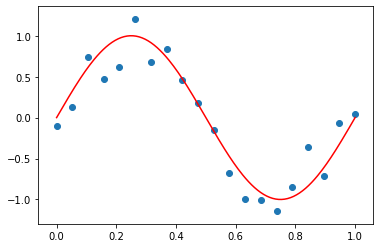

In [87]:
plt.plot(x_sin, y_sin, "r-")  # original sin function curve
plt.scatter(x, y)

In [88]:
data_1 = {'X':x, 'Y':y}
data = pd.DataFrame(data = data_1, dtype=np.int8)
data

,X,Y
0,0.000000,-0.100655
1,0.052632,0.123466
2,0.105263,0.744884
3,0.157895,0.477214
4,0.210526,0.621284
5,0.263158,1.207707
6,0.315789,0.677899
7,0.368421,0.835941
8,0.421053,0.460626
9,0.473684,0.176189


In [6]:
X_train,X_test, Y_train, Y_test =model_selection.train_test_split(x, y, test_size=0.5, random_state=3)

In [144]:
train = {'X':X_train, 'Y': Y_train}
train_data = pd.DataFrame(data = train, dtype=np.int8)
train_data

,X,Y
0,0.473684,0.237901
1,0.578947,-0.421769
2,1.000000,0.202538
3,0.947368,-0.162660
4,0.684211,-0.950614
5,0.263158,1.167077
6,0.000000,0.100110
7,0.421053,0.415397
8,0.157895,0.648296
9,0.526316,-0.159142


In [145]:
test = {'X':X_test, 'Y': Y_test}
test_data = pd.DataFrame(data = test, dtype=np.int8)
test_data

,X,Y
0,0.736842,-1.170818
1,0.105263,0.519501
2,0.052632,0.682805
3,0.894737,-0.622776
4,0.210526,0.919025
5,0.842105,-0.838238
6,0.315789,1.068300
7,0.368421,0.677289
8,0.789474,-0.755381
9,0.631579,-0.913760


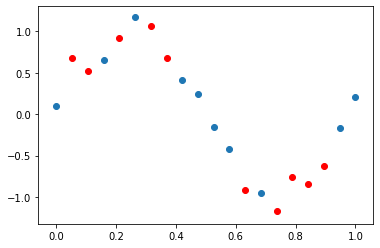

In [196]:
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test, c = 'r')

## b. Using room mean square error, find weights of polynomial regression for order is 0, 1, 3, 9

In [10]:
def  polynomialRegression(i:int ) :
    polynomial = PolynomialFeatures(degree = i)# quadratic polynomial
    x_transformed = polynomial.fit_transform(X_train.reshape(10,1))
    poly_linear_model = LinearRegression()
    poly_linear_model.fit(x_transformed, Y_train)# train
    return polynomial, poly_linear_model

### weights of polynomial regression for order is 0

In [404]:
polynomial_0, poly_linear_model_0 = polynomialRegression(0) 

coef = poly_linear_model_0.coef_
tmp = [0]*10
for i in range(len(coef)) :
    tmp[i] = int(coef[i])
res['0'] = tmp
coef

array([0.])

### weights of polynomial regression for order is 1

In [405]:

polynomial_1, poly_linear_model_1 = polynomialRegression(1)
 
coef = poly_linear_model_1.coef_
tmp = [0]*10
for i in range(len(coef)) :
    tmp[i] = int(coef[i])
res['1'] = tmp
coef

array([ 0.        , -0.84393666])

### weights of polynomial regression for order is 3

In [406]:
polynomial_3, poly_linear_model_3 = polynomialRegression(3)
 
coef = poly_linear_model_3.coef_
tmp = [0]*10
for i in range(len(coef)) :
    tmp[i] = int(coef[i])
res['3'] = tmp
coef

array([  0.        ,  10.54357363, -32.04219135,  21.74789823])

### weights of polynomial regression for order is 9

In [407]:
polynomial_9, poly_linear_model_9 = polynomialRegression(9)
coef = poly_linear_model_9.coef_
tmp = [0]*10
for i in range(len(coef)) :
    tmp[i] = int(coef[i])
res['9'] = tmp
coef

array([ 0.00000000e+00, -9.15509033e+02,  1.78726994e+04, -1.41897131e+05,
        6.07692204e+05, -1.54842153e+06,  2.41692818e+06, -2.26586227e+06,
        1.17006720e+06, -2.55463736e+05])

## c. Display weights in table 

In [409]:
from prettytable import PrettyTable
x= PrettyTable()
x.add_column("label\order", ["W0","W1","W2","W3","W4","W5","W6","W7","W8","W9"])
x.add_column("0", res["0"])
x.add_column("1", res["1"])
x.add_column("3", res["3"])
x.add_column("9", res["9"])
print(x)
# the label 0, W0 in the table is the weights of polynomial regression for order is 0
# the label 1, W0 and W1 in the table is the weights of polynomial regression for order is 1
# the label 3, W0, W1, W2 and W3 in the table is the weights of polynomial regression for order is 3
# the label 9, W0-W9 in the table is the weights of polynomial regression for order is 9

+-------------+---+---+-----+----------+
| label\order | 0 | 1 |  3  |    9     |
+-------------+---+---+-----+----------+
|      W0     | 0 | 0 |  0  |    0     |
|      W1     | 0 | 0 |  10 |   -915   |
|      W2     | 0 | 0 | -32 |  17872   |
|      W3     | 0 | 0 |  21 | -141897  |
|      W4     | 0 | 0 |  0  |  607692  |
|      W5     | 0 | 0 |  0  | -1548421 |
|      W6     | 0 | 0 |  0  | 2416928  |
|      W7     | 0 | 0 |  0  | -2265862 |
|      W8     | 0 | 0 |  0  | 1170067  |
|      W9     | 0 | 0 |  0  | -255463  |
+-------------+---+---+-----+----------+


## d. Draw a chart of fit data
### weights of polynomial regression for order is 0

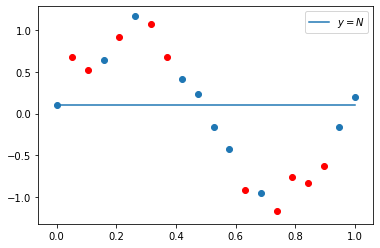

In [16]:
xx = np.linspace(0, 1, 100)
xx_transformed_0 = polynomial_0.fit_transform(xx.reshape(xx.shape[0], 1))
yy = poly_linear_model_0.predict(xx_transformed_0)
plt.plot(xx, yy,label="$y = N$")
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test, c = 'r')
plt.legend()

### weights of polynomial regression for order is 1

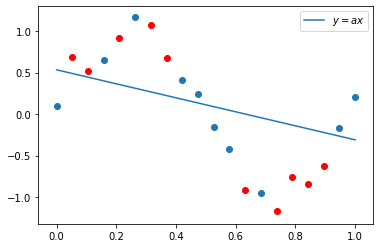

In [17]:
xx = np.linspace(0, 1, 100)
xx_transformed_1 = polynomial_1.fit_transform(xx.reshape(xx.shape[0], 1))
yy = poly_linear_model_1.predict(xx_transformed_1)
plt.plot(xx, yy,label="$y = ax$")
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test, c = 'r')
plt.legend()

### weights of polynomial regression for order is 3

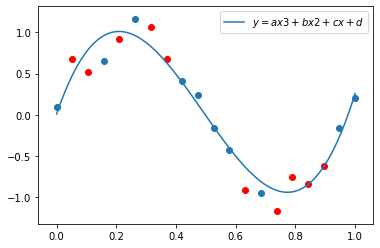

In [18]:
xx = np.linspace(0, 1, 100)
xx_transformed_3 = polynomial_3.fit_transform(xx.reshape(xx.shape[0], 1))
yy = poly_linear_model_3.predict(xx_transformed_3)
plt.plot(xx, yy,label="$y = ax3+bx2+cx+d$")
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test, c = 'r')
plt.legend()

### weights of polynomial regression for order is 9

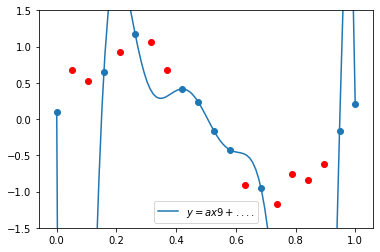

In [19]:
xx = np.linspace(0, 1, 100)
xx_transformed_9 = polynomial_9.fit_transform(xx.reshape(xx.shape[0], 1))
yy = poly_linear_model_9.predict(xx_transformed_9)
plt.plot(xx, yy,label="$y = ax9+....$")
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test, c = 'r')
plt.ylim(-1.5 ,1.5)
plt.legend()

## e. Draw train error vs test error

In [20]:
train_error = [0]*10     #train error
test_error = [0]*10      #test error

In [21]:
def getMse(Y, yy):
    standard = tf.square(Y - yy)
    mse = tf.reduce_mean(standard)
    return mse.numpy()

In [22]:
def getError(i:int,  model) :
    polynomial = PolynomialFeatures(degree = i)
    xx_transformed_test = polynomial.fit_transform(X_test.reshape(X_test.shape[0], 1))
    xx_transformed_train = polynomial.fit_transform(X_train.reshape(X_test.shape[0], 1))
    yy_test = model.predict(xx_transformed_test)
    yy_train = model.predict(xx_transformed_train)

    test_error[i] = getMse(Y_test, yy_test)

    train_error[i] = getMse(Y_train, yy_train)

In [23]:
polynomial_2, poly_linear_model_2 = polynomialRegression(2)
polynomial_4, poly_linear_model_4 = polynomialRegression(4)
polynomial_5, poly_linear_model_5 = polynomialRegression(5)
polynomial_6, poly_linear_model_6 = polynomialRegression(6)
polynomial_7, poly_linear_model_7 = polynomialRegression(7)
polynomial_8, poly_linear_model_8 = polynomialRegression(8)
# 0,1,3,9 I used the model fitted before.
getError(0, poly_linear_model_0)
getError(1, poly_linear_model_1)
getError(2, poly_linear_model_2)
getError(3, poly_linear_model_3)
getError(4, poly_linear_model_4)
getError(5, poly_linear_model_5)
getError(6, poly_linear_model_6)
getError(7, poly_linear_model_7)
getError(8, poly_linear_model_8)
getError(9, poly_linear_model_9)

print(test_error)
print(train_error)

[0.725708887555328, 0.420433859602508, 0.4115158761946587, 0.03579509356913618, 0.038926156314548516, 0.033872153110566336, 0.05833211565743508, 0.1812106704430893, 0.554845693668926, 44.22283722466817]
[0.3079871717563623, 0.24240685436800796, 0.23498551578658944, 0.01957321021379334, 0.01690032825391209, 0.005587179857868378, 0.003830224903521952, 0.000986326895842674, 0.0006297917682982702, 8.623765820671452e-21]


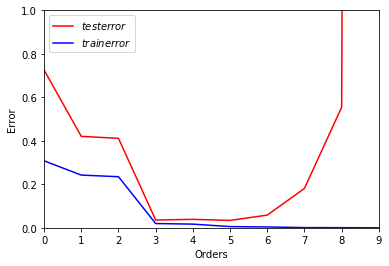

In [410]:
xx = np.linspace(0, 9, 10)
plt.ylim(0 ,1)
plt.xlim(0,9)
plt.plot(xx, test_error, label = "$test error$", c = 'r')
plt.plot(xx, train_error, label = "$train error$", c = 'b')

plt.xlabel('Orders')

plt.ylabel('Error')
plt.legend()

## f. Generate 100 more data and fit 9th order model and draw fit

In [82]:
x_100 = np.linspace(0,1,100)     # Gegerate new 100 samples
d_100 = np.random.normal(loc=0,scale=0.2,size=100)    # N from the normal gaussian distribution 
y_100 = 2*math.pi*x_100
for i in range(100):
    y_100[i] = math.sin(y_100[i])+ d_100[i]
data_1 = {'X':x_100, 'Y':y_100}
data_100 = pd.DataFrame(data = data_1, dtype=np.int8)
data_100

,X,Y
0,0.000000,-0.033498
1,0.010101,-0.028916
2,0.020202,0.021077
3,0.030303,0.065874
4,0.040404,0.301074
...,...,...
95,0.959596,-0.192493
96,0.969697,-0.360793
97,0.979798,0.178334
98,0.989899,-0.137827


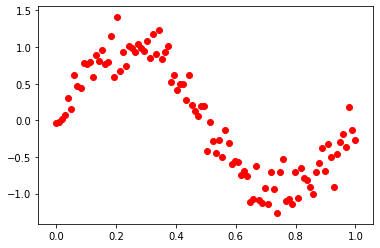

In [140]:
plt.scatter(x_100, y_100, marker = "o",c = "r")

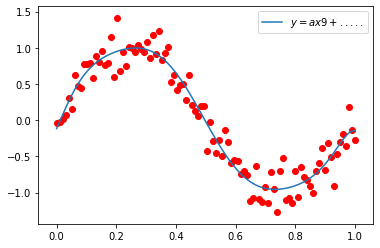

In [139]:
polynomial = PolynomialFeatures(degree = 9)# quadratic polynomial
x_transformed = polynomial.fit_transform(x_100.reshape(100,1))
poly_linear_model = LinearRegression()
poly_linear_model.fit(x_transformed, y_100)# train

xx_transformed_9 = polynomial.fit_transform(x_100.reshape(x_100.shape[0], 1))
yy = poly_linear_model.predict(xx_transformed_9)
plt.plot(x_100, yy,label="$y = ax9+.....$")
plt.scatter(x_100, y_100, c = "r")
plt.legend()

## g. Regularize using the sum of weights. 
## h. Draw chart for lamda


In [347]:
def regularizeRidge(alpha):
    alpha = math.exp(alpha)
    print(alpha)
    polynomial = PolynomialFeatures(degree = 9)# quadratic polynomial
    x_transformed = polynomial.fit_transform(X_train.reshape(10,1))
    poly_linear_model = Ridge(alpha = alpha)
    poly_linear_model.fit(x_transformed, Y_train)# train
    
    return poly_linear_model

def chartRidge(alpha):
    model = regularizeRidge(alpha)
    xx = np.linspace(0, 1, 100)
    x_transformed = polynomial.fit_transform(xx.reshape(100,1))
    yy = model.predict(x_transformed)
    plt.plot(xx, yy,label=alpha)
    plt.scatter(X_train, Y_train)
    plt.scatter(X_test, Y_test, c = 'r')
    plt.legend()

6.305116760146989e-16


/Users/wanghengchao/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.22001e-17): result may not be accurate.
  overwrite_a=True).T


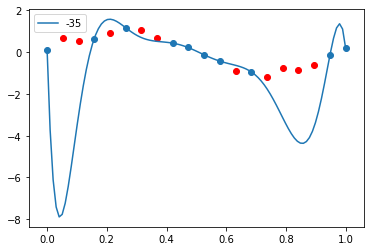

In [411]:
chartRidge(-35) #ln(lambda) = -35, lambda = 6.305116760146989e-16

9.357622968840175e-14


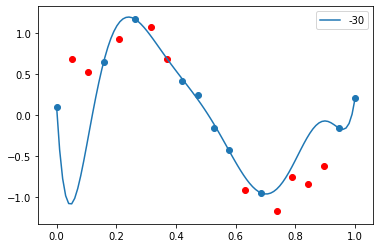

In [392]:
chartRidge(-30)    #ln(lambda) = -30, lambda = 9.357622968840175e-14

1.3887943864964021e-11


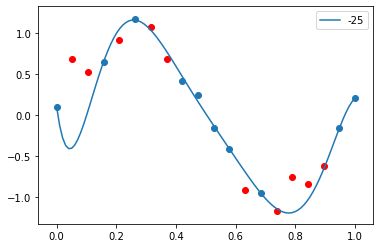

In [393]:
chartRidge(-25)    #ln(lambda) = -25, lambda = 1.3887943864964021e-11

2.061153622438558e-09


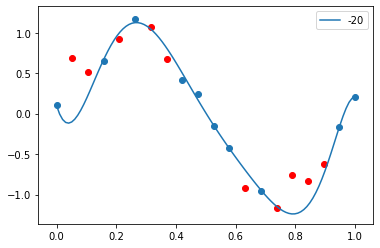

In [394]:
chartRidge(-20)    #ln(lambda) = -20, lambda = 2.061153622438558e-09

3.059023205018258e-07


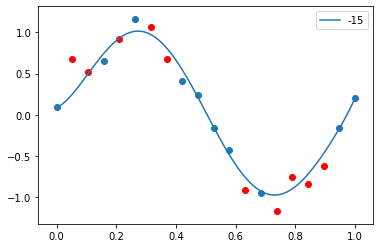

In [395]:
chartRidge(-15)    #ln(lambda) = -15, lambda = 3.059023205018258e-07

## i. Draw test  and train error according to lamda 

In [378]:
train_error_ridge = np.zeros(30)
test_error_ridge = np.zeros(30)

def getErrorRidge(i:int,  model) :     # A new error function
    xx_transformed_test = polynomial.fit_transform(X_test.reshape(X_test.shape[0], 1))
    xx_transformed_train = polynomial.fit_transform(X_train.reshape(X_train.shape[0], 1))
    yy_test = model.predict(xx_transformed_test)
    yy_train = model.predict(xx_transformed_train)
    test_error_ridge[i] = getMse(Y_test, yy_test)
    train_error_ridge[i] = getMse(Y_train, yy_train)

In [414]:
xx = list(range(-30, 0))
for i in xx:
    model = regularizeRidge(i)
    getErrorRidge(i+30, model)

9.357622968840175e-14
2.543665647376923e-13
6.914400106940203e-13
1.8795288165390832e-12
5.109089028063325e-12
1.3887943864964021e-11
3.775134544279098e-11
1.026187963170189e-10
2.7894680928689246e-10
7.582560427911907e-10
2.061153622438558e-09
5.602796437537268e-09
1.522997974471263e-08
4.139937718785167e-08
1.1253517471925912e-07
3.059023205018258e-07
8.315287191035679e-07
2.2603294069810542e-06
6.14421235332821e-06
1.670170079024566e-05
4.5399929762484854e-05
0.00012340980408667956
0.00033546262790251185
0.0009118819655545162
0.0024787521766663585
0.006737946999085467
0.01831563888873418
0.049787068367863944
0.1353352832366127
0.36787944117144233


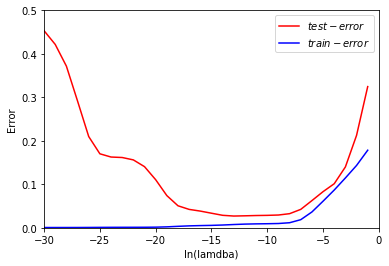

In [415]:
xx = list(range(-30, 0))
plt.ylim(0 ,0.5)
plt.xlim(-30,0)
plt.plot(xx, test_error_ridge, label = "$test-error$", c = 'r')
plt.plot(xx, train_error_ridge, label = "$train-error$", c = 'b')

plt.xlabel('ln(lamdba)')

plt.ylabel('Error')
plt.legend()

In [421]:
#   get the best lambda
best_lambda = 0
for i in range(-30,0):
    if test_error_ridge[i+30] == test_error_ridge.min(): best_lambda = i
print("best ln(lambda) = ", best_lambda)
best_lambda = math.exp(best_lambda)
print("best lambda = ", best_lambda)

best ln(lambda) =  -13
best lambda =  2.2603294069810542e-06


### In summary, the model which ln(lamdba) = -13, lambda = 2.2603294069810542e-06 has the best test performance. 